<a href="https://colab.research.google.com/github/Karennina00/Pemograan_Python/blob/main/Tubes_SKO_Stephanie_Karennina_Mane_Pareira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Stephanie Karennina Mane Pareira

NIM : 1101183525

Kelas : TT-42-07

TUGAS BESAR MATA KULIAH SISTEM KOMUNIKASI OPTIK

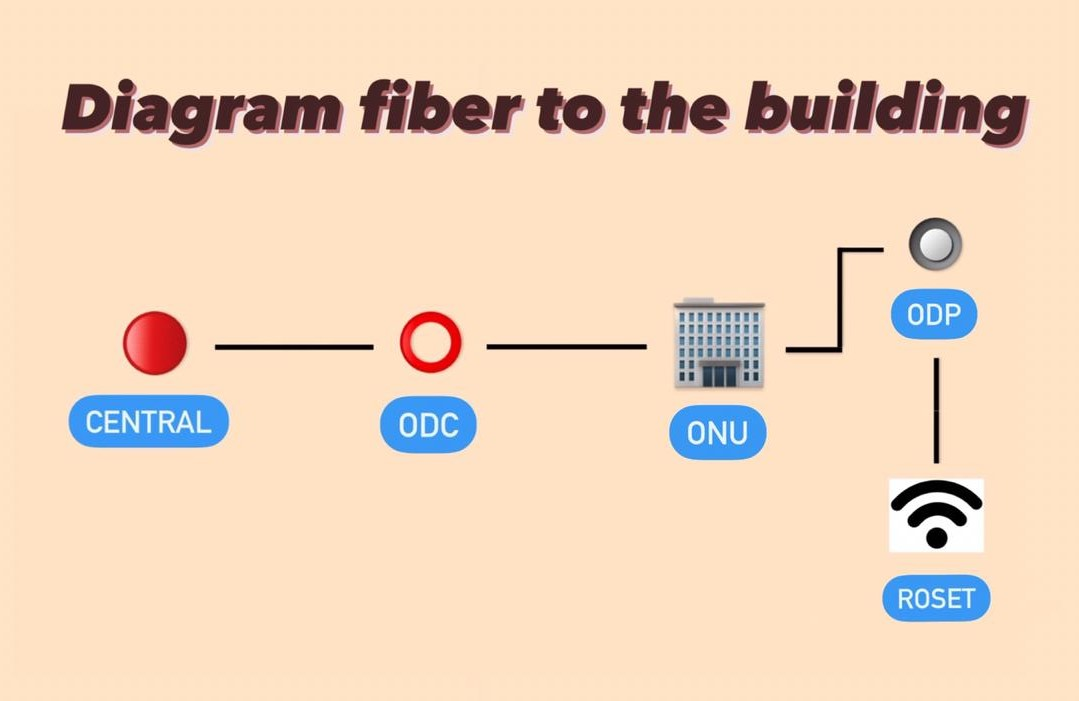

In [30]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [31]:
#Converter yang digunakan
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter-parameter
R = 0.85 #Responsivitas (A/W)
SM = 6 #Safety Margin (dB)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
id = 200*10**-9 #arus gelap (A)
B = 8*10**9 #Bandwith (Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 290 #dalam Kelvin
RL = 50 #Ekuivalen Resistansi (Ohm)

#Parameter Pr
#jarak dari sentral ke ONU = 15 km (maksimal 20km)
#jarak dari ONU ke Roset = <500 m --> 3(tinggi setiap lantai)*11(lantai sesuai absen) = 33 m 
#jarak total = 15000 + 33 = 15033 m

d = np.arange(0.033,15.034,1) #Jarak (km)
L_fiber = 0.28 #0.28 #Loss dari fiber berdasarkan jenis G625D (dB)  
N_splicer = 8 #Jumlah Splicer
L_splicer = 0.1 #Loss dari splicer (db)
N_connector = 6 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 16 + 19.5 #loss dari splitter (dB) diambil redaman yang paling kecil, milik 1:32
Pt = 3 #Daya tx (dBm)

In [32]:
#RUMUS PR
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-41.10924 -41.38924 -41.66924 -41.94924 -42.22924 -42.50924 -42.78924
 -43.06924 -43.34924 -43.62924 -43.90924 -44.18924 -44.46924 -44.74924
 -45.02924 -45.30924]


In [33]:
#Arus Primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("Ip = ", ip)

Ip =  [6.58407737e-05 6.17298079e-05 5.78755226e-05 5.42618911e-05
 5.08738876e-05 4.76974241e-05 4.47192927e-05 4.19271098e-05
 3.93092652e-05 3.68548736e-05 3.45537292e-05 3.23962637e-05
 3.03735060e-05 2.84770453e-05 2.66989957e-05 2.50319640e-05]


In [34]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [2.29321896e-10 2.01579110e-10 1.77192577e-10 1.55756265e-10
 1.36913264e-10 1.20349842e-10 1.05790221e-10 9.29919861e-11
 8.17420497e-11 7.18531022e-11 6.31604948e-11 5.55194971e-11
 4.88028881e-11 4.28988375e-11 3.77090441e-11 3.31470989e-11]


In [35]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[19.50474632 18.94568713 18.38656938 17.8273967  17.26817252 16.70890002
 16.1495822  15.59022189 15.03082172 14.47138418 13.91191158 13.35240611
 12.79286982 12.23330462 11.67371231 11.11409457]


In [36]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[4.72288445 4.42847667 4.15239322 3.89349696 3.65072088 3.42306389
 3.20958672 3.00940819 2.82170164 2.64569157 2.48065052 2.3258961
 2.18078823 2.04472655 1.91714791 1.79752415]


In [37]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.69703032e-04 6.12042639e-04 1.87609771e-03 4.98454563e-03
 1.16783532e-02 2.44969015e-02 4.66238652e-02 8.14645883e-02
 1.32030620e-01 2.00293616e-01 2.86689902e-01 3.89904902e-01
 5.06974922e-01 6.33654943e-01 7.64945341e-01 8.95657000e-01]


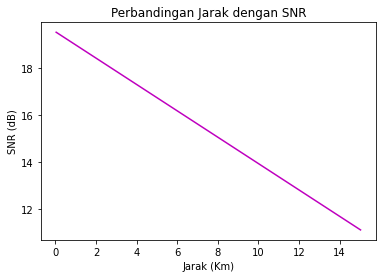

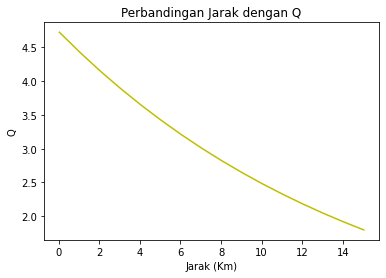

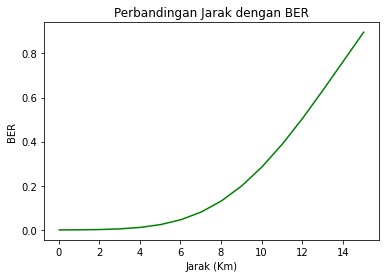

In [38]:
#GRAFIK
def grafik_1():
  plt.figure()
  plt.plot(d,SNR,'m')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_2():
  plt.figure()
  plt.plot(d,Q,'y')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_3():
  plt.figure()
  plt.plot(d,BER,'g')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_1()
grafik_2()
grafik_3()